# Insper - Modelagem e Simulação do Mundo Físico

## Projeto 2 - Modelagem do Resfriamento da Água 

----

### Introdução

<center>
<div>
<img/>
</div>
</center>
<center>

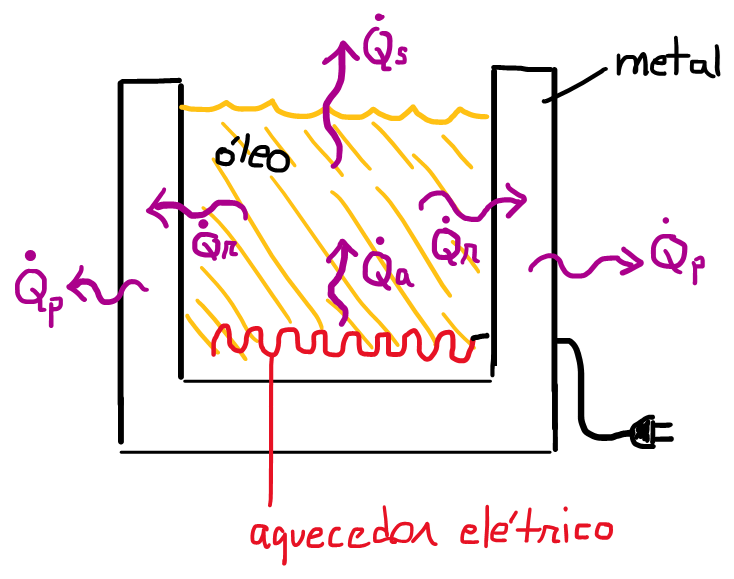

In [40]:
# Importa bibliotecas necessárias
from scipy.integrate import odeint
from math import *
import numpy as np
import matplotlib.pyplot as plt

----

### Item 1 - Dados experimentais


#### a) Importação

Suponha, para efeitos didáticos, que tenhamos medido efetivamente a temperatura num tonel gigante cheio de óleo. Observe o código abaixo. Nele, declaramos duas listas com os dados medidos de tempo e temperatura do óleo.

In [41]:
# Importa dados experimentais

----

### Item 2 - 1ª Iteração

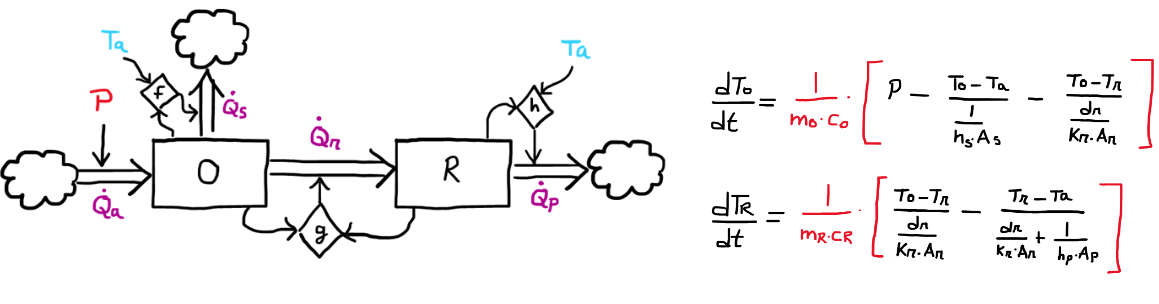

#### a) Parâmetros



In [42]:
# Declara os parâmetros do modelo

Ta = 25 + 273.15 # Temperatura do ambiente [K]
har = 24 # coeficiente de convectividade do ar []

kr = 1.5 # coeficiente de condutividade do recipiente [W/(m*K)]

ml = 0.2 # massa do liguido [kg]
mr = 0.309 # massa do recipiente [kg] (caneca da toca)

cl = 3600 # calor específico do líquido [J/(kg*K)] água salgada com 12% de sal
cr = 1050 # calor específico do recipiente [J/(kg*K)]

H = 0.097 # altura do recipiente [m]
ri = 0.078 # raio interno do recipiente [m]
re = 0.081 # raio externo do recipiente [m]
ri_e = (ri+re)/2 #0.0795 # raio intermediario do recipiente [m]

Asup = pi*(ri**2) # área da superfície do líquido [m²]
Al = 2*pi*re*H # área da superfície lateral do recipiente [m²]

emissividade = 0.95 # emissividade de todos os materiais (simplificação)


sigma = 5.6703e-8 # Constante de Stefan-Boltzman (W/(m2.K4))

In [43]:
def coef_acucar (T, lista_coef_acucar):
    lista_coef_acucar= [3950, 3960, 3970, 3970, 3980, 3990, 4000, 4000, 4010]
    coef=0
    if T>=20 and T<30:
        coef= lista_coef_acucar[0]
    elif T>=30 and T<40:
        coef= lista_coef_acucar[1]
    elif T>=40 and T<50:
        coef= lista_coef_acucar[2]
    elif T>=50 and T<60:
        coef= lista_coef_acucar[3]
    elif T>60 and T<70:
        coef= lista_coef_acucar[4]
    elif T>70 and T<80:
        coef= lista_coef_acucar[5]
    elif T>80 and T<90:
        coef= lista_coef_acucar[6]
    elif T>90 and T<100:
        coef= lista_coef_acucar[7]
    elif T>=100:
        coef= lista_coef_acucar[8]
    return coef

#### b) Modelo


In [44]:
def modelo1(x, t):
    Tl = x[0]
    Tr = x[1]

    Qsup = (Tl - Ta)*har*Asup
    Qlr = (Tl - Tr)*((log(ri_e/ri))/(2*pi*H*kr))
    Qrsup = (Tr - Ta)/((1/(har*Al)) + ((log(re/ri_e))/(2*pi*H*kr)))
    Qisup = emissividade*sigma*Asup*(Tl**4)
    Qirsup = emissividade*sigma*Al*(Tr**4)

    dUl_dt = - Qsup - Qlr # - Qisup
    dTl_dt = dUl_dt/(cl*ml)

    dUr_dt = Qlr - Qrsup # - Qirsup
    dTr_dt = dUr_dt/(cr*mr)

    return [dTl_dt, dTr_dt]

In [45]:
def modelo2(x, t):
    Tl = x[0]
    Tr = x[1]

    Qsup = (Tl - Ta)*har*Asup
    Qlr = (Tl - Tr)*((log(ri_e/ri))/(2*pi*H*kr))
    Qrsup = (Tr - Ta)/((1/(har*Al)) + ((log(re/ri_e))/(2*pi*H*kr)))
    Qisup = emissividade*sigma*Asup*(Tl**4)
    Qirsup = emissividade*sigma*Al*(Tr**4)

    cl = coef_acucar(Tl, lista_coef_acucar)

    dUl_dt = - Qsup - Qlr # - Qisup
    dTl_dt = dUl_dt/(cl*ml)


    dUr_dt = Qlr - Qrsup # - Qirsup
    dTr_dt = dUr_dt/(cr*mr)

    return [dTl_dt, dTr_dt]

In [ ]:
def modelo3(x, t):
    Tl = x[0]
    Tr = x[1]

    Qsup = (Tl - Ta)*har*Asup
    Qlr = (Tl - Tr)*((log(ri_e/ri))/(2*pi*H*kr))
    Qrsup = (Tr - Ta)/((1/(har*Al)) + ((log(re/ri_e))/(2*pi*H*kr)))
    Qisup = emissividade*sigma*Asup*(Tl**4)
    Qirsup = emissividade*sigma*Al*(Tr**4)

    cl = 4200

    dUl_dt = - Qsup - Qlr # - Qisup
    dTl_dt = dUl_dt/(cl*ml)


    dUr_dt = Qlr - Qrsup # - Qirsup
    dTr_dt = dUr_dt/(cr*mr)

    return [dTl_dt, dTr_dt]

#### c) Implementação


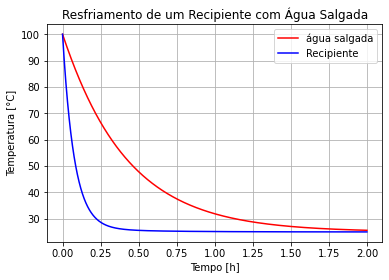

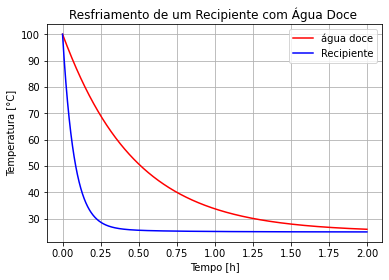

In [46]:
Tmax = 2*60*60 # segundos
dt = 1
tempo_s = np.arange(0, Tmax, dt)
tempo_h = list([t/3600 for t in tempo_s])

X0 = [373.15, 373.15] # [Tl_0, Tr_0]

Xy1 = odeint(modelo1, X0, tempo_s)

Tl_y1 = list(Xy1[:,0] - 273.15)

Tr_y1 = list(Xy1[:,1] - 273.15)

Xy2= odeint(modelo2, X0, tempo_s)

Tl_y2= list(Xy2[:,0]-273.15)

Tr_y2= list(Xy2[:,1]-273.15)

# plt.plot(t_lista_exp, To_lista_exp, label="Experimento")
plt.plot(tempo_h, Tl_y1, color="red", label="água salgada")
plt.plot(tempo_h, Tr_y1, color="blue", label="Recipiente")
plt.title("Resfriamento de um Recipiente com Água Salgada")
plt.xlabel("Tempo [h]")
plt.ylabel("Temperatura [°C]")
plt.legend()
plt.grid()
plt.show()

plt.plot(tempo_h, Tl_y2, color= "red", label="água doce")
plt.plot(tempo_h, Tr_y2, color= "blue", label= "Recipiente")
plt.title("Resfriamento de um Recipiente com Água Doce ")
plt.xlabel("Tempo [h]")
plt.ylabel("Temperatura [°C]")
plt.legend()
plt.grid()
plt.show()